In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics

### Data Collection

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_train, df_test = train_test_split(df)

### Data Exploration

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

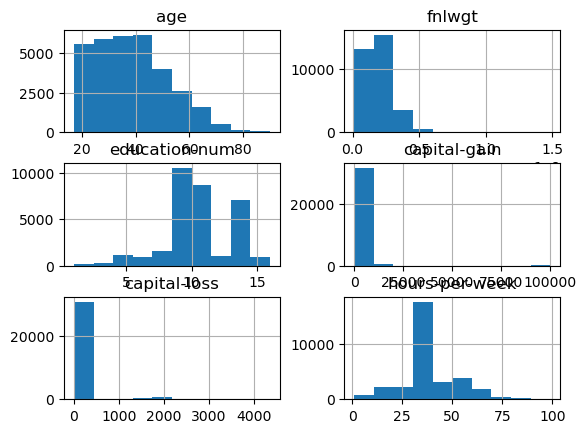

In [5]:
df.hist()

<Axes: xlabel='workclass'>

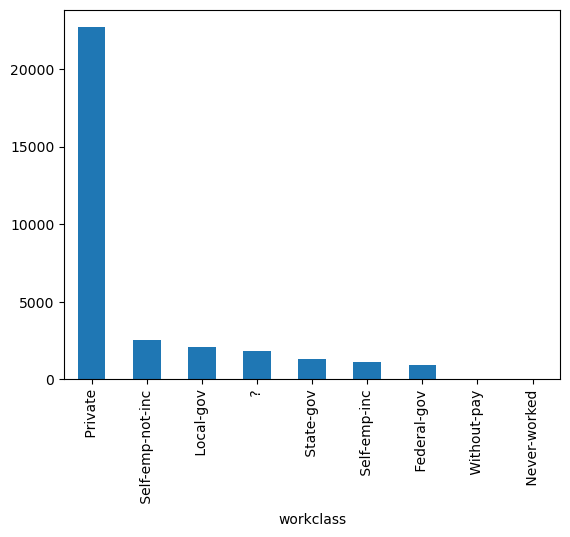

In [6]:
df['workclass'].value_counts().plot(kind='bar')

In [8]:
print('df size', df.shape)
print('df_train size', df_train.shape)
print('df_test size', df_test.shape)

df size (32561, 15)
df_train size (24420, 15)
df_test size (8141, 15)


<Axes: xlabel='workclass'>

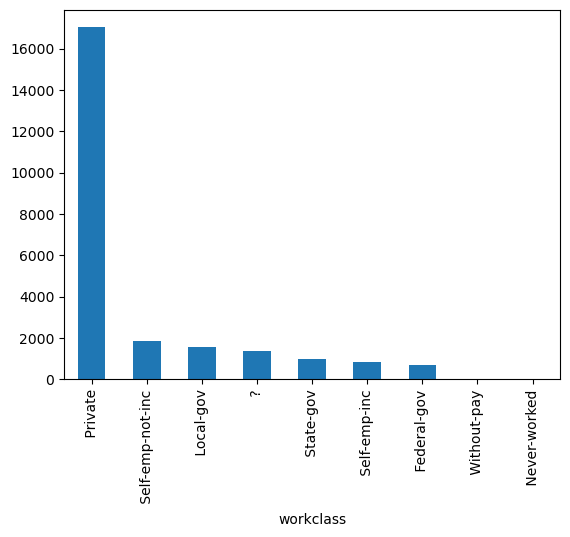

In [9]:
df_train['workclass'].value_counts().plot(kind='bar')

<Axes: xlabel='target'>

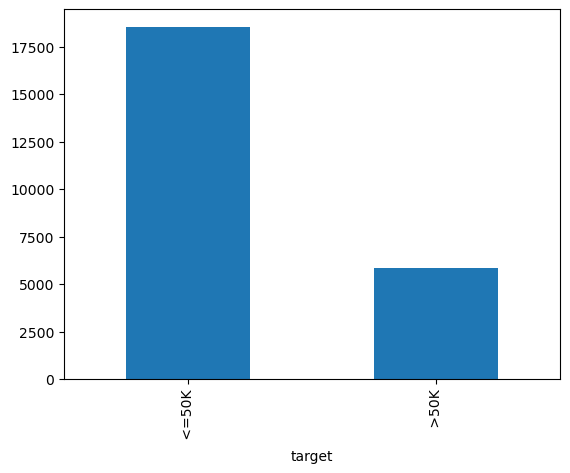

In [10]:
df_train['target'].value_counts().plot(kind='bar')

### Data Preprocessing

In [11]:
df_train['workclass'].unique()

array([' Private', ' Self-emp-inc', ' ?', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-not-inc', ' Never-worked', ' Without-pay'],
      dtype=object)

In [12]:
df_train = df_train.replace(' ?', pd.NaT)
df_test = df_test.replace(' ?', pd.NaT)

In [13]:
df_train =df_train.dropna()
df_test = df_test.dropna()

In [14]:
print('df_train size', df_train.shape)
print('df_test size', df_test.shape)

df_train size (22605, 15)
df_test size (7557, 15)


In [24]:
x_train = df_train.drop('target', axis=1)
y_train = df_train['target']
x_test = df_test.drop('target', axis=1)
y_test = df_test['target']
print('x_train size', x_train.shape)
print('y_train size', y_train.shape)
print('x_test size', x_test.shape)
print('y_test',y_test.shape)

x_train size (22605, 14)
y_train size (22605,)
x_test size (7557, 14)
y_test (7557,)


### Feature Engineering

In [25]:
categorical_attributes = x_train.select_dtypes(include=['object']).columns.tolist()
categorical_attributes

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [26]:
numerical_attributes = x_train.select_dtypes(include=['int64']).columns.tolist()
numerical_attributes

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [27]:
ct = sklearn.compose.ColumnTransformer(
    [("Scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes),
     ("OneHotEncoding", sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'), categorical_attributes)]) #unknown values are ignored.
ct.fit(x_train)
x_train = ct.transform(x_train) 
x_test = ct.transform(x_test)
print('x_train size', x_train.shape)
print('x_test size', x_test.shape)

x_train size (22605, 104)
x_test size (7557, 104)


### Model Training

In [28]:
model = sklearn.svm.SVC()
model.fit(x_train,y_train) # make sure  the model is fitted on training data

SVC()

### Model Evaluation

#### Making predictions

In [29]:
predictions = model.predict(x_test)
predictions

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

#### Checking accuracy

In [33]:
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
accuracy

0.8516607119227206